# Logistic Regression implementation

A simple implementation of logistic regression for predicting if passengers of spaceship titanic were transported to another dimension

## Problem description

**Goal**: Predict if passengers are transported to another dimension

# Setup

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB, CategoricalNB
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

set_config(transform_output='pandas')

# Exploratory Analysis

In [46]:
raw = pd.read_csv("data/train.csv")
raw

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [47]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Pre-Processing and train model


In [48]:
df = raw.drop(columns=['PassengerId','Name'])

X = df.drop('Transported', axis=1)
y = df.Transported

# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# fill empty categorical features
for catg in categorical_features:
    df[catg] = df[catg].fillna('Unknown')

# convert object to string
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str)

num_transformer = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='median'), numerical_features),  # fill empty numerical features
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough', # all other columns remain untouched
    verbose_feature_names_out=False # keep original column names and not add 'remainder' prefix
)

# run a pipeline with all transformers
model = Pipeline([
    ('transform', num_transformer),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])


model.fit(X_train, y_train)


,steps,"[('transform', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('imputer', ...), ('onehot', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


## Test and Plot Results

In [49]:
# get predictions for test set
predictions = model.predict(X_test)

# Score (R²)
accuracy = model.score(X_test, y_test)
accuracy

0.745830937320299

### Confusion Matrix
Displays how many results were predicted correctly

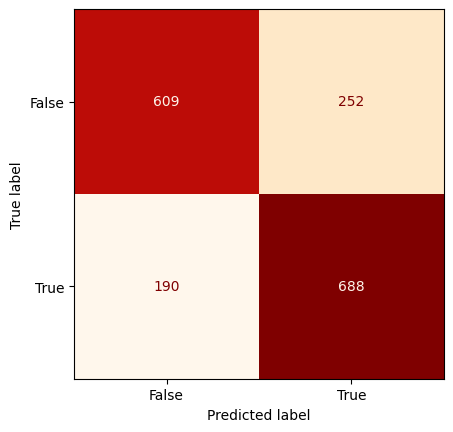

In [50]:
# Plot confusion matrix with correct labels
ConfusionMatrixDisplay.from_predictions(
    y_test,
    predictions,
    cmap='OrRd',
    colorbar=False
)

# Predict with test data

In [51]:
test_data = pd.read_csv("data/test.csv")

passengerIds = test_data.PassengerId
t_data = test_data.drop(columns=['PassengerId','Name'])

test_predictions = model.predict(t_data)

results = pd.DataFrame(
    {
        'PassengerId': passengerIds,
        'Transported': test_predictions
    }
)

results.to_csv(f"output.csv", index=False)